# Aprendizaje no supervisado

### **Bienvenida**

¡Bienvenidos al Notebook 12! En este notebook exploraremos uno de los pilares fundamentales del aprendizaje automático: el **aprendizaje no supervisado**. A diferencia del aprendizaje supervisado, donde contamos con etiquetas para guiar a los modelos, en el aprendizaje no supervisado trabajamos con datos no etiquetados. El objetivo principal es encontrar patrones o estructuras ocultas en los datos.

---

### **¿Qué aprenderás en este notebook?**

1. Diferencias clave entre aprendizaje supervisado y no supervisado.
2. Introducción al clustering, específicamente al algoritmo **K-means**.
3. Reducción de dimensionalidad con **PCA (Análisis de Componentes Principales)**.
4. Aplicación práctica combinando K-means y PCA en un dataset real.
5. Técnicas de visualización para entender mejor los datos.

---

## **Sección 1: Introducción al aprendizaje no supervisado**

### **¿Qué es el aprendizaje no supervisado?**

El aprendizaje no supervisado se enfoca en trabajar con datos que no tienen etiquetas predefinidas. Esto significa que el modelo no tiene "respuestas" y debe encontrar patrones, relaciones o agrupaciones en los datos por sí mismo.

---

### **Ejemplos comunes de tareas de aprendizaje no supervisado:**

- **Clustering (agrupamiento):** Agrupar datos similares en categorías o clusters.  
  Ejemplo: segmentación de clientes.

- **Reducción de dimensionalidad:** Resumir características de los datos en un espacio más pequeño para facilitar el análisis o visualización.

- **Análisis de patrones:** Identificar estructuras ocultas, como reglas de asociación en bases de datos.

---

### **¿Por qué es importante?**

- Es útil cuando no tenemos etiquetas o estas son costosas de obtener.
- Permite explorar datos desconocidos, identificar grupos o tendencias, y preparar datos para tareas supervisadas.

---

### **Diferencia con el aprendizaje supervisado:**

| **Característica**       | **Aprendizaje Supervisado**                          | **Aprendizaje No Supervisado**                     |
|---------------------------|-----------------------------------------------------|---------------------------------------------------|
| **Etiquetas**             | Requiere datos etiquetados (ej. Spam/No Spam)       | No requiere etiquetas                             |
| **Objetivo**              | Predecir una salida específica                      | Encontrar patrones o estructuras ocultas          |
| **Ejemplos de algoritmos**| Regresión, Clasificación                            | Clustering, PCA                                   |

---

### **Dataset que utilizaremos**

En este notebook trabajaremos con el **Dataset Iris**, que contiene información sobre las medidas de 150 flores de tres especies diferentes:

- *Setosa*  
- *Versicolor*  
- *Virginica*

Este dataset es ideal para tareas de aprendizaje no supervisado porque incluye características numéricas y clusters bien definidos que podemos identificar sin necesidad de etiquetas.

Las características del dataset incluyen:  
- **Longitud del sépalo (sepal length):** Qué tan largo es el sépalo (la parte externa de la flor).  
- **Ancho del sépalo (sepal width):** Qué tan ancho es el sépalo.  
- **Longitud del pétalo (petal length):** Qué tan largo es el pétalo (la parte interna de la flor).  
- **Ancho del pétalo (petal width):** Qué tan ancho es el pétalo.  

¡Empecemos a explorar estos datos y a descubrir sus patrones ocultos!


## Exploración inicial de los datos

Antes de aplicar cualquier técnica de aprendizaje no supervisado, es fundamental explorar y entender el dataset. Esto nos ayudará a identificar patrones iniciales, detectar valores atípicos y preparar los datos para su análisis.

### Carga del dataset Iris

El dataset Iris está incluido en la librería `sklearn`, por lo que no es necesario descargarlo manualmente. Vamos a cargarlo y convertirlo en un DataFrame para facilitar su exploración.


In [ ]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()

# Crear un DataFrame con las características del dataset
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregar las etiquetas (especies) como columna adicional
df_iris['species'] = iris.target

# Mostrar las primeras filas del DataFrame
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

### Descripción del dataset

El dataset contiene las siguientes columnas:

1. **sepal length (cm):** Longitud del sépalo en centímetros.
2. **sepal width (cm):** Ancho del sépalo en centímetros.
3. **petal length (cm):** Longitud del pétalo en centímetros.
4. **petal width (cm):** Ancho del pétalo en centímetros.
5. **species:** Etiqueta que identifica la especie de la flor (\(0 = \text{Setosa}, 1 = \text{Versicolor}, 2 = \text{Virginica}\)).

In [ ]:
# Información general del DataFrame
df_iris.info()

# Descripción estadística de las características numéricas
df_iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

### Visualización inicial

Para entender mejor las distribuciones y relaciones entre las características, realizaremos algunas visualizaciones:

#### 1. Distribución de cada característica

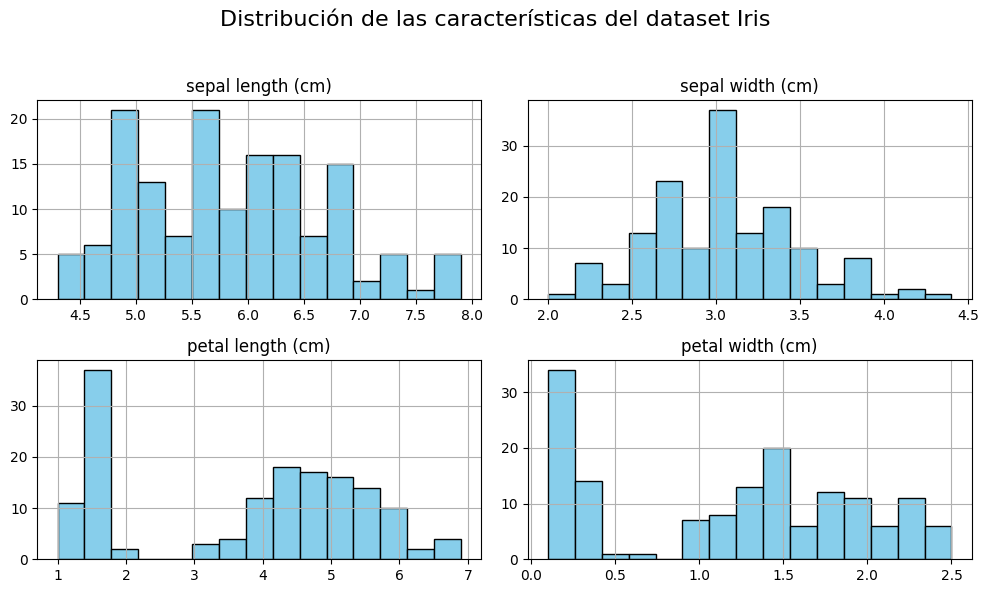

In [ ]:
import matplotlib.pyplot as plt

# Crear histogramas para cada característica
df_iris.drop('species', axis=1).hist(bins=15, figsize=(10, 6), layout=(2, 2), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de las características del dataset Iris', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2. Relación entre las características

Usaremos un `pairplot` para observar cómo se relacionan las diferentes características entre sí.

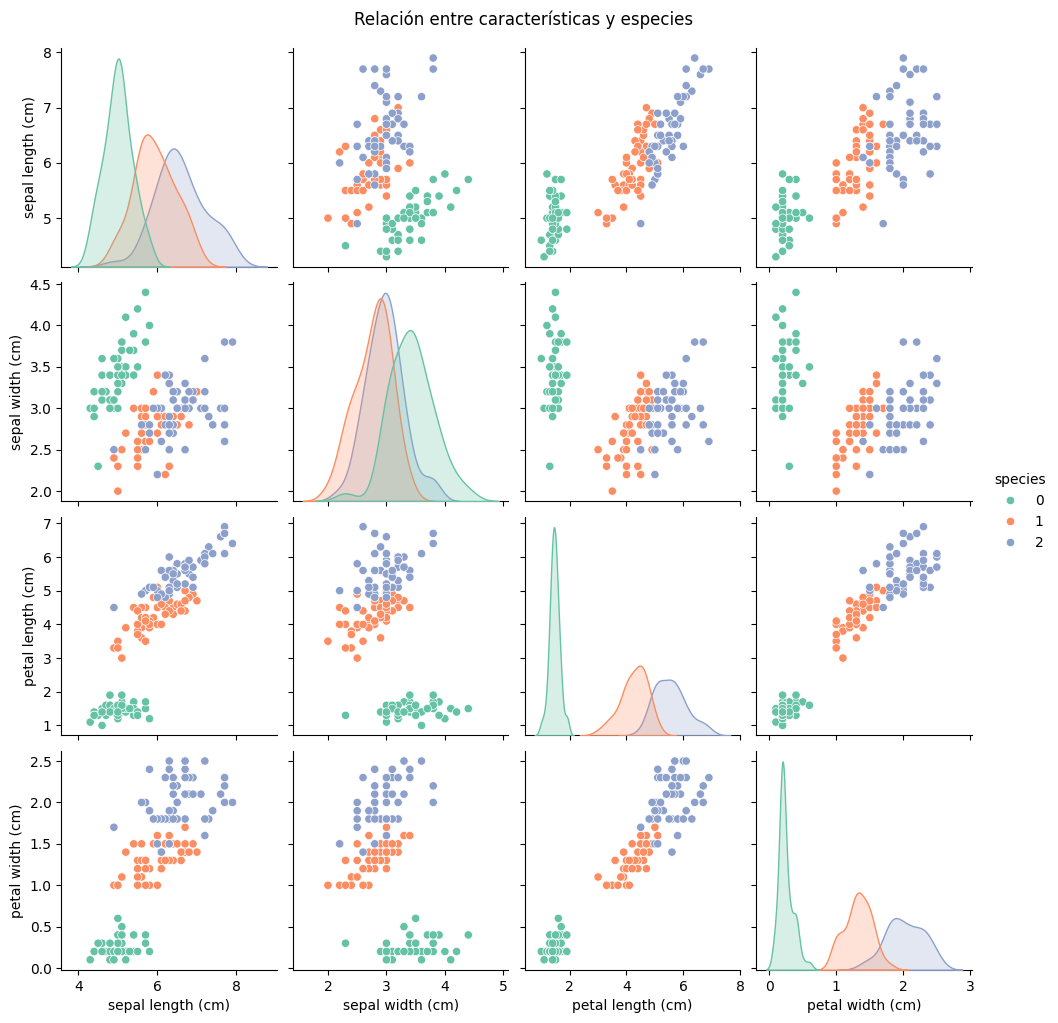

In [ ]:
import seaborn as sns

# Pairplot con las especies coloreadas
sns.pairplot(df_iris, hue='species', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Relación entre características y especies', y=1.02)
plt.show()

#### 3. Matriz de correlación

Para identificar relaciones lineales entre las características, calcularemos y visualizaremos la matriz de correlación.

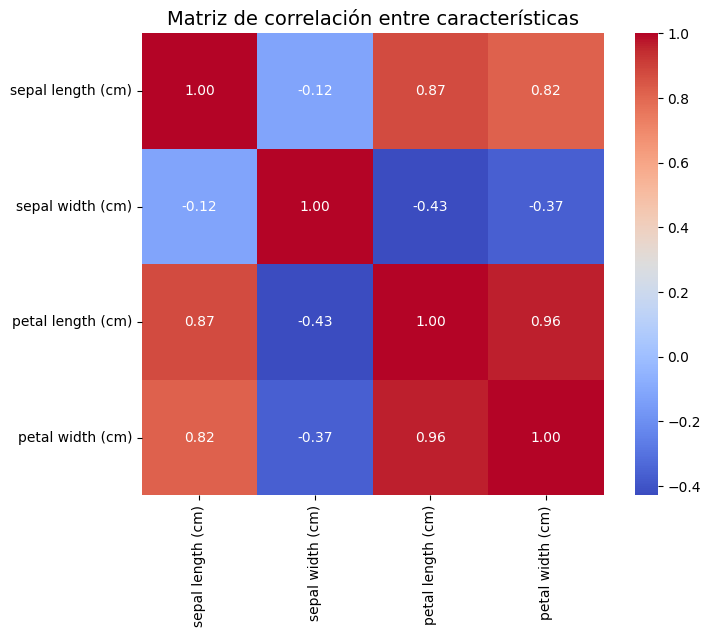

In [ ]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df_iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de correlación entre características', fontsize=14)
plt.show()

### Reflexión inicial

Basándonos en la exploración, responde estas preguntas antes de continuar:

1. ¿Qué características parecen tener mayor correlación?
2. ¿Las especies parecen separarse bien en función de algunas características?

Esto nos guiará en los pasos siguientes al aplicar clustering y reducción de dimensionalidad.

¡Ahora, sigamos con la preparación de los datos!

## Preparación de los datos

Antes de aplicar técnicas de aprendizaje no supervisado, es importante preparar los datos. Esto incluye estandarizar las características para que todas estén en un rango comparable y eliminar cualquier característica que no sea relevante para nuestro análisis.

### Estandarización de los datos

¿Por qué estandarizar?  
Los algoritmos como K-means y PCA se ven afectados por la escala de los datos. Por ejemplo, una característica medida en centímetros puede tener un rango mucho mayor que otra medida en milímetros, lo que puede sesgar los resultados. La estandarización asegura que todas las características contribuyan por igual al análisis.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar las características numéricas y las etiquetas
X = df_iris.drop('species', axis=1)
y = df_iris['species']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con los datos estandarizados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del DataFrame estandarizado
df_scaled.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

### Verificación de la estandarización

Después de estandarizar, la media de cada característica debería ser cercana a 0 y la desviación estándar igual a 1. Vamos a verificarlo:


In [ ]:
# Verificar media y desviación estándar
print("Media de las características estandarizadas:\n", df_scaled.mean(axis=0))
print("\nDesviación estándar de las características estandarizadas:\n", df_scaled.std(axis=0))

Media de las características estandarizadas:
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

Desviación estándar de las características estandarizadas:
 sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## Clustering con K-means

El algoritmo de K-means es una técnica de aprendizaje no supervisado utilizada para agrupar datos en un número predefinido de clusters. El objetivo es minimizar la variación dentro de cada cluster mientras se maximizan las diferencias entre clusters.

### ¿Cómo funciona K-means?

1. Se elige un número de clusters, \( K \).
2. Se inicializan \( K \) centroides de manera aleatoria.
3. Para cada dato, se calcula la distancia al centroide más cercano y se asigna al cluster correspondiente.
4. Se recalculan los centroides como el promedio de los puntos asignados a cada cluster.
5. Este proceso se repite hasta que los centroides no cambien significativamente o se alcance un número máximo de iteraciones.

Ahora aplicaremos K-means al dataset Iris con \( K = 3 \), ya que sabemos que hay tres especies de flores.


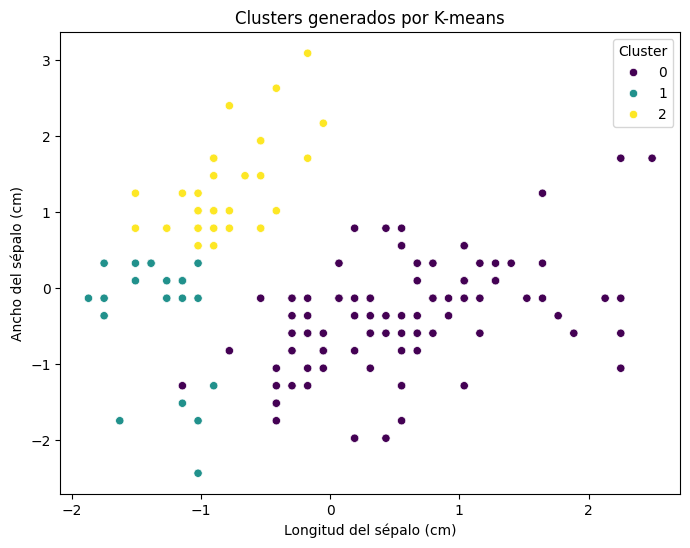

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Añadir los clusters al DataFrame
df_scaled['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled['sepal length (cm)'],
    y=df_scaled['sepal width (cm)'],
    hue=df_scaled['cluster'],
    palette='viridis'
)
plt.title("Clusters generados por K-means")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Ancho del sépalo (cm)")
plt.legend(title="Cluster")
plt.show()

## Análisis de los resultados

En el gráfico anterior, cada punto representa una flor del dataset Iris, y los colores indican los clusters a los que cada flor fue asignada por el algoritmo de K-means. Observemos algunos aspectos clave:

1. **Clusters distintos**: Los puntos de diferentes colores representan los grupos formados por K-means. Podemos ver que las flores fueron agrupadas según similitudes en las características seleccionadas (longitud y ancho del sépalo).

2. **Centroides**: Aunque no se visualizan en este gráfico, K-means calcula centroides que representan el "centro" de cada cluster. Estos centroides son fundamentales para determinar las asignaciones de cada punto.

3. **Interpretación biológica**: Los clusters deberían correlacionarse con las tres especies de flores en el dataset Iris: Setosa, Versicolor y Virginica. Sin embargo, dado que este es un algoritmo no supervisado, K-means no tiene conocimiento previo de estas especies; simplemente agrupa los datos basándose en sus patrones.

Ahora vamos a explorar la relación entre los clusters generados por K-means y las etiquetas reales del dataset.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Ahora añadimos las etiquetas reales al DataFrame escalado
df_scaled['true_species'] = iris.target

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(df_scaled['true_species'], df_scaled['cluster']))

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(df_scaled['true_species'], df_scaled['cluster']))


Matriz de confusión:
[[ 0 17 33]
 [46  4  0]
 [50  0  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.19      0.08      0.11        50
           2       0.00      0.00      0.00        50

    accuracy                           0.03       150
   macro avg       0.06      0.03      0.04       150
weighted avg       0.06      0.03      0.04       150



## Interpretación de la matriz de confusión

La matriz de confusión compara las etiquetas reales (especies) con los clusters generados por K-means. Cada fila representa una clase real, mientras que cada columna representa un cluster asignado.

- Un buen desempeño de K-means se refleja en valores altos en la diagonal de la matriz, lo que indica que la mayoría de los puntos de una clase real fueron asignados al mismo cluster.
- Si hay valores significativos fuera de la diagonal, significa que K-means agrupó incorrectamente algunas flores.

Con esta información, podemos evaluar qué tan bien se correlacionan los clusters de K-means con las especies reales del dataset Iris.


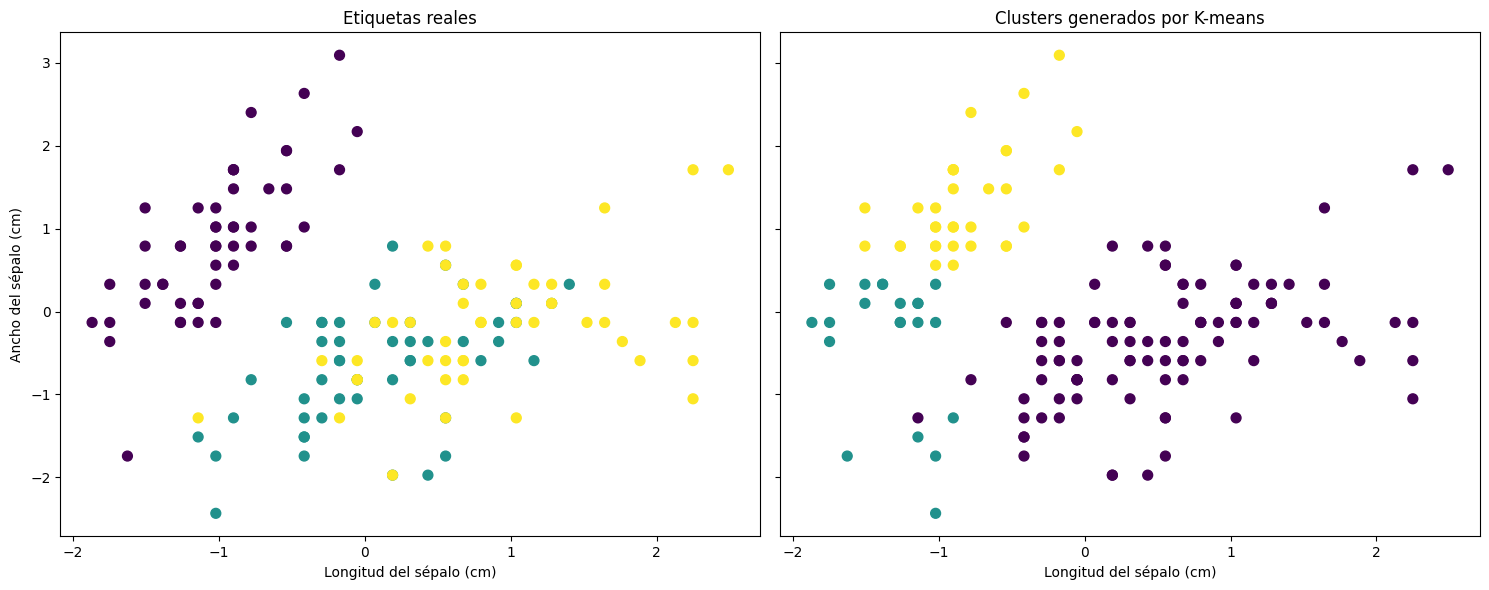

In [ ]:
import matplotlib.pyplot as plt

# Comparar etiquetas reales con clusters generados
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Visualización de etiquetas reales
axes[0].scatter(df_scaled['sepal length (cm)'], df_scaled['sepal width (cm)'], c=df_scaled['true_species'], cmap='viridis', s=50)
axes[0].set_title('Etiquetas reales')
axes[0].set_xlabel('Longitud del sépalo (cm)')
axes[0].set_ylabel('Ancho del sépalo (cm)')

# Visualización de clusters generados
axes[1].scatter(df_scaled['sepal length (cm)'], df_scaled['sepal width (cm)'], c=df_scaled['cluster'], cmap='viridis', s=50)
axes[1].set_title('Clusters generados por K-means')
axes[1].set_xlabel('Longitud del sépalo (cm)')

plt.tight_layout()
plt.show()

## Resumen

1. **Diferencias entre etiquetas reales y clusters generados**:
   - Observamos que los clusters generados por K-means no se alinean perfectamente con las etiquetas reales de las especies de flores del dataset Iris.
   - Esto se debe a que K-means busca minimizar la distancia dentro de los clusters sin tener en cuenta las etiquetas reales, ya que no supervisa el proceso.

2. **Fortalezas del aprendizaje no supervisado**:
   - Nos permitió identificar patrones y agrupaciones en los datos sin necesidad de etiquetas.
   - Este enfoque es útil en escenarios donde las etiquetas no están disponibles o son difíciles de obtener.

3. **Limitaciones de K-means**:
   - K-means depende del número de clusters definido previamente (`n_clusters`), lo que puede influir en los resultados si el número no es adecuado.
   - Sensible a valores atípicos y a la escala de los datos, lo que hace que la estandarización sea crucial.

4. **Importancia de la visualización**:
   - Las gráficas generadas nos permitieron entender mejor cómo K-means clasifica los datos y compararlos con las etiquetas reales.

## Conclusión

El aprendizaje no supervisado, aunque desafiante, nos brinda herramientas poderosas para analizar datos sin etiquetas. Técnicas como K-means y PCA pueden ser aplicadas en una amplia variedad de campos, desde la segmentación de clientes hasta la detección de patrones en datos complejos.

Prueba experimentar con otros datasets o ajustar los parámetros de K-means para explorar cómo afectan los resultados.